<a href="https://colab.research.google.com/github/GustavoGatti/BreastCancerSiameseNeuralNetwork/blob/main/TesteNumero3000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.2.0rc2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input, Lambda, Reshape
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from numpy import mean
from numpy import std
from numpy import ndarray
import numpy.random as rng
import random

In [ ]:
from keras import backend as K
import keras as KER

In [ ]:
from keras.regularizers import l2

In [ ]:
from keras.layers import merge

In [ ]:
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [ ]:
cancer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataR234.csv')

In [ ]:
x = pd.DataFrame(data=cancer)
x.drop('Classification', inplace=True, axis=1)
x = np.asarray(x)
x

array([[ 48.        ,  23.5       ,  70.        , ...,   9.7024    ,
          7.99585   , 417.114     ],
       [ 83.        ,  20.69049454,  92.        , ...,   5.429285  ,
          4.06405   , 468.786     ],
       [ 82.        ,  23.12467037,  91.        , ...,  22.43204   ,
          9.27715   , 554.697     ],
       ...,
       [ 65.        ,  32.05      ,  97.        , ...,  22.54      ,
         10.33      , 314.05      ],
       [ 72.        ,  25.59      ,  82.        , ...,  33.75      ,
          3.27      , 392.46      ],
       [ 86.        ,  27.18      , 138.        , ...,  14.11      ,
          4.35      ,  90.09      ]])

In [ ]:
y = cancer.Classification
y = np.asarray(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

Vetores de cancer sem concatenação

In [ ]:
scaler = StandardScaler()

In [ ]:
tudo_cancer = []
target_cancer = [1,1,1,1,1]
vetor_cancer1 = [45,21.3039485766758,102,13.852,3.4851632,7.6476,21.056625,23.03408,552.444]
vetor_cancer2 = [68,21.0828132906055,	102,6.2,1.55992,9.6994,8.574655,13.74244,448.799]
vetor_cancer3 = [45,23.1404958677686,	116,4.902,1.4026256,17.9973,4.294705,5.2633,518.586]
vetor_cancer4 = [44,27.8876170655567,99,9.208,2.2485936,12.6757,5.47817,23.03306,407.206]
vetor_cancer5 = [68,35.56,131,8.15,2.63353666666667,17.87,11.9,4.19,198.4]
tudo_cancer.append(vetor_cancer1)
tudo_cancer.append(vetor_cancer2)
tudo_cancer.append(vetor_cancer3)
tudo_cancer.append(vetor_cancer4)
tudo_cancer.append(vetor_cancer5)
tudo_cancer


[[45,
  21.3039485766758,
  102,
  13.852,
  3.4851632,
  7.6476,
  21.056625,
  23.03408,
  552.444],
 [68,
  21.0828132906055,
  102,
  6.2,
  1.55992,
  9.6994,
  8.574655,
  13.74244,
  448.799],
 [45,
  23.1404958677686,
  116,
  4.902,
  1.4026256,
  17.9973,
  4.294705,
  5.2633,
  518.586],
 [44,
  27.8876170655567,
  99,
  9.208,
  2.2485936,
  12.6757,
  5.47817,
  23.03306,
  407.206],
 [68, 35.56, 131, 8.15, 2.63353666666667, 17.87, 11.9, 4.19, 198.4]]

In [ ]:
scaler = StandardScaler()
tudo_cancer = scaler.fit_transform(tudo_cancer)
tudo_cancer
tudo_cancer = tudo_cancer.reshape(5,9,1)
tudo_cancer

array([[[-0.78693459],
        [-0.82226505],
        [-0.66390613],
        [ 1.74868703],
        [ 1.61043143],
        [-1.31692015],
        [ 1.79656761],
        [ 1.12047163],
        [ 1.02473697]],

       [[ 1.22412048],
        [-0.86275286],
        [-0.66390613],
        [-0.73404882],
        [-0.93261638],
        [-0.82833763],
        [-0.28060272],
        [-0.01344053],
        [ 0.19079095]],

       [[-0.78693459],
        [-0.48601037],
        [ 0.4979296 ],
        [-1.15519247],
        [-1.14038607],
        [ 1.14759028],
        [-0.99284487],
        [-1.04819865],
        [ 0.75230951]],

       [[-0.87437177],
        [ 0.38314326],
        [-0.91287093],
        [ 0.24191425],
        [-0.02294954],
        [-0.11960961],
        [-0.79590013],
        [ 1.12034715],
        [-0.14387369]],

       [[ 1.22412048],
        [ 1.78788502],
        [ 1.74275359],
        [-0.10135999],
        [ 0.48552057],
        [ 1.11727712],
        [ 0.27278011],
   

Vetor controle

In [ ]:
tudo_controle = []
target_controle = [0,0,0,0,0]
vetor_controle1 = [48,23.5,70,2.707,0.467408666666667,8.8071,9.7024,7.99585,417.114]
vetor_controle2 = [49,22.8544576872143,92,3.226,0.732086933333333,6.8317,13.67975,10.3176,530.41]
vetor_controle3 = [25,22.86,82,4.09,0.827270666666667,20.45,23.67,5.14,313.73]
vetor_controle4 = [32,36.5126374295103,87,14.026,3.0099796,49.3727,5.1,17.10223,588.46]
vetor_controle5 = [66,31.4465408805031,90,9.245,2.05239,45.9624,10.35526,23.3819,1102.11]
tudo_controle.append(vetor_controle1)
tudo_controle.append(vetor_controle2)
tudo_controle.append(vetor_controle3)
tudo_controle.append(vetor_controle4)
tudo_controle.append(vetor_controle5)
tudo_controle

[[48, 23.5, 70, 2.707, 0.467408666666667, 8.8071, 9.7024, 7.99585, 417.114],
 [49,
  22.8544576872143,
  92,
  3.226,
  0.732086933333333,
  6.8317,
  13.67975,
  10.3176,
  530.41],
 [25, 22.86, 82, 4.09, 0.827270666666667, 20.45, 23.67, 5.14, 313.73],
 [32, 36.5126374295103, 87, 14.026, 3.0099796, 49.3727, 5.1, 17.10223, 588.46],
 [66,
  31.4465408805031,
  90,
  9.245,
  2.05239,
  45.9624,
  10.35526,
  23.3819,
  1102.11]]

In [ ]:
tudo_controle = scaler.transform(tudo_controle)
tudo_controle
tudo_controle = tudo_controle.reshape(5,9,1)
tudo_controle

array([[[-0.52462306],
        [-0.42018851],
        [-3.31953065],
        [-1.86737297],
        [-2.37571124],
        [-1.04081555],
        [-0.09293055],
        [-0.71472989],
        [-0.06415217]],

       [[-0.43718589],
        [-0.53838129],
        [-1.49378879],
        [-1.6989804 ],
        [-2.02609853],
        [-1.51120541],
        [ 0.56895483],
        [-0.43139341],
        [ 0.84744751]],

       [[-2.53567814],
        [-0.53736655],
        [-2.32367146],
        [-1.41865058],
        [-1.90037063],
        [ 1.73163666],
        [ 2.23146891],
        [-1.06324565],
        [-0.89599814]],

       [[-1.9236179 ],
        [ 1.96230405],
        [-1.90873012],
        [ 1.80514234],
        [ 0.98276288],
        [ 8.61882141],
        [-0.85883278],
        [ 0.39657393],
        [ 1.31452808]],

       [[ 1.04924613],
        [ 1.03474902],
        [-1.65976533],
        [ 0.25391912],
        [-0.28211428],
        [ 7.80674763],
        [ 0.01571428],
   

Vetor Teste

In [ ]:
tudo_teste = []
target_teste = [1,1,1,0,0,0]
#daqui para baixo é cancer
teste1 = [41,26.6727632982777,97,22.033,5.27176246666667,44.7059,13.494865,27.8325,783.796]
teste2 = [71,25.5102040816327,112,10.395,2.871792,19.0653,5.4861,42.7447,799.898]
teste3 = [60,31.2314098750744,131,30.13,9.73600733333333,37.843,8.40443,11.50005,396.021]
#daqui para baixo é controle
teste4 = [51,27.6887781337764,77,3.855,0.732193,20.092,3.19209,10.37518,473.859]
teste5 = [69,35.0927015294738,101,5.646,1.4066068,83.4821,6.796985,82.1,263.499]
teste6 = [75,25.7,94,8.079,1.8732508,65.926,3.74122,4.49685,206.802]
tudo_teste.append(teste1)
tudo_teste.append(teste2)
tudo_teste.append(teste3)
tudo_teste.append(teste4)
tudo_teste.append(teste5)
tudo_teste.append(teste6)

In [ ]:
tudo_teste = scaler.transform(tudo_teste)
tudo_teste = tudo_teste.reshape(6,9,1)
tudo_teste

array([[[-1.1366833 ],
        [ 0.16071486],
        [-1.07884746],
        [ 4.40306001],
        [ 3.9703449 ],
        [ 7.50754501],
        [ 0.53818744],
        [ 1.70605036],
        [ 2.88623613]],

       [[ 1.48643201],
        [-0.05213889],
        [ 0.16597653],
        [ 0.6270433 ],
        [ 0.8002313 ],
        [ 1.40190656],
        [-0.79458047],
        [ 3.52587171],
        [ 3.01579567]],

       [[ 0.52462306],
        [ 0.99536054],
        [ 1.74275359],
        [ 7.0301787 ],
        [ 9.86715219],
        [ 5.87332482],
        [-0.30893049],
        [-0.28709225],
        [-0.23387018]],

       [[-0.26231153],
        [ 0.3467377 ],
        [-2.73861279],
        [-1.4948977 ],
        [-2.02595843],
        [ 1.64638832],
        [-1.17633507],
        [-0.42436659],
        [ 0.39242815]],

       [[ 1.31155766],
        [ 1.70232703],
        [-0.7468944 ],
        [-0.91379734],
        [-1.13512732],
        [16.74108315],
        [-0.5764313 ],
   

In [ ]:
def MontandoDataSet(tudo_cancer,target_cancer, tudo_controle, target_controle, tudo_teste, target_teste):
  
  x_anterior = []

  for i in range(len(tudo_cancer)):
    x_anterior.append(tudo_cancer[i])
    x_anterior.append(tudo_controle[i])
  

  print(" ------------- ", x_anterior, " ------------- ")
  
  x1 = []
  x2 = []
  target = []
  for i in range(len(x)):
    for j in range(len(tudo_controle)):
      x1.append(tudo_cancer[i])
      x2.append(tudo_controle[j])
      if(target_cancer[i] == target_controle[j]):
        target.append(1)
      else:
        target.append(0)

  x1 = np.asarray(x1)
  x2 = np.asarray(x2)
  x = [x1,x2]
  target = np.asarray(target)

  return x, target

In [ ]:
def Transformacao(dataset):

  novo_data = pd.DataFrame(data=dataset)
  novo_data.drop('Classification',inplace=True,axis=1)  
  data_x = novo_data 
  data_y = dataset.Classification
  x_train = np.asarray(data_x)
  y_train = np.asarray(data_y)
  print(x_train)
  test_x = []
  test_y = []
  for i in range(116):
    if(i<7):
      test_x.append(x_train[i])
      test_y.append(y_train[i])
    elif(i>108):
      test_x.append(x_train[i])
      test_y.append(y_train[i])


  test_x = np.asarray(test_x)
  test_y = np.asarray(test_y)
  print(test_x.shape)
  print(test_y.shape)

  scaler = StandardScaler()
  test_x = scaler.fit_transform(test_x)
  x_train = scaler.fit_transform(x_train)
  x_train = x_train.reshape(116,9,1)
  test_x = test_x.reshape(14,9,1)

  return test_x, test_x, test_y, test_y, scaler

In [ ]:
def Montando_data_set(x_train,x_train1,y_train,y_train1):
  target = []
  trainx = []
  trainx1 =[]
  print(y_train)
  print(y_train1)
  print(len(x_train))
  print(len(x_train1))
  for i in range(14):
    for j in range(14):
      trainx.append(x_train[i])
      trainx1.append(x_train1[j])
      if(y_train[i] == y_train1[j]):
        target.append(1)
      else:
        target.append(0)
  trainx=np.asarray(trainx)
  trainx1=np.asarray(trainx1)
  xtreino = [trainx,trainx1]
  target = np.asarray(target)

  return xtreino,target

In [ ]:
def Transformacao_teste(dataset):

  novo_data = pd.DataFrame(data=dataset)
  novo_data.drop('Classification',inplace=True,axis=1)  
  data_x = novo_data 
  data_y = dataset.Classification
  x_train = np.asarray(data_x)
  y_train = np.asarray(data_y)
  print(x_train)
  test_x = []
  test_y = []
  y = 0
  for i in range(116):
    if((i>7) & (i<15)):
      test_x.append(x_train[i])
      test_y.append(y_train[i])
      y = y+1
    elif((i>85) & (i<93)):
      test_x.append(x_train[i])
      test_y.append(y_train[i])
      y = y+1

  print(y)
  test_x = np.asarray(test_x)
  test_y = np.asarray(test_y)

  scaler = StandardScaler()
  test_x = scaler.fit_transform(test_x)
  print(test_x.shape)
  test_x = test_x.reshape(14,9,1)

  return test_x, test_x, test_y, test_y

In [ ]:
def Montando_data_set_test(x_train,x_train1,y_train,y_train1):
  target = []
  trainx = []
  trainx1 =[]
  print(y_train)
  print(y_train1)
  print(len(x_train))
  print(len(x_train1))
  for i in range(14):
    for j in range(14):
      trainx.append(x_train[i])
      trainx1.append(x_train1[j])
      if(y_train[i] == y_train1[j]):
        target.append(1)
      else:
        target.append(0)
  trainx=np.asarray(trainx)
  trainx1=np.asarray(trainx1)
  xtreino = [trainx,trainx1]
  target = np.asarray(target)

  return xtreino,target

In [ ]:
def Transformacao_valid(dataset):

  novo_data = pd.DataFrame(data=dataset)
  novo_data.drop('Classification',inplace=True,axis=1)  
  data_x = novo_data 
  data_y = dataset.Classification
  x_train = np.asarray(data_x)
  y_train = np.asarray(data_y)
  print(x_train)
  test_x = []
  test_y = []
  y = 0
  for i in range(116):
    if((i>15) & (i<23)):
      test_x.append(x_train[i])
      test_y.append(y_train[i])
      y = y+1
    elif((i>77) & (i<85)):
      test_x.append(x_train[i])
      test_y.append(y_train[i])
      y = y+1

  print(y)
  test_x = np.asarray(test_x)
  test_y = np.asarray(test_y)

  scaler = StandardScaler()
  test_x = scaler.fit_transform(test_x)
  print(test_x.shape)
  test_x = test_x.reshape(14,9,1)

  return test_x, test_x, test_y, test_y

In [ ]:
def Montando_data_set_valid(x_train,x_train1,y_train,y_train1):
  target = []
  trainx = []
  trainx1 =[]
  print(y_train)
  print(y_train1)
  print(len(x_train))
  print(len(x_train1))
  for i in range(14):
    for j in range(14):
      trainx.append(x_train[i])
      trainx1.append(x_train1[j])
      if(y_train[i] == y_train1[j]):
        target.append(1)
      else:
        target.append(0)
  trainx=np.asarray(trainx)
  trainx1=np.asarray(trainx1)
  xtreino = [trainx,trainx1]
  target = np.asarray(target)

  return xtreino,target

In [ ]:
def Transformacao_valid2(dataset):

  novo_data = pd.DataFrame(data=dataset)
  novo_data.drop('Classification',inplace=True,axis=1)  
  data_x = novo_data 
  data_y = dataset.Classification
  x_train = np.asarray(data_x)
  y_train = np.asarray(data_y)
  print(x_train)
  test_x = []
  test_y = []
  y = 0
  for i in range(116):
    if((i>23) & (i<31)):
      test_x.append(x_train[i])
      test_y.append(y_train[i])
      y = y+1
    elif((i>69) & (i<77)):
      test_x.append(x_train[i])
      test_y.append(y_train[i])
      y = y+1

  print(y)
  test_x = np.asarray(test_x)
  test_y = np.asarray(test_y)

  scaler = StandardScaler()
  test_x = scaler.fit_transform(test_x)
  print(test_x.shape)
  test_x = test_x.reshape(14,9,1)

  return test_x, test_x, test_y, test_y

In [ ]:
def Montando_data_set_valid2(x_train,x_train1,y_train,y_train1):
  target = []
  trainx = []
  trainx1 =[]
  print(y_train)
  print(y_train1)
  print(len(x_train))
  print(len(x_train1))
  for i in range(14):
    for j in range(14):
      trainx.append(x_train[i])
      trainx1.append(x_train1[j])
      if(y_train[i] == y_train1[j]):
        target.append(1)
      else:
        target.append(0)
  trainx=np.asarray(trainx)
  trainx1=np.asarray(trainx1)
  xtreino = [trainx,trainx1]
  target = np.asarray(target)

  return xtreino,target

In [ ]:
def Transformacao_valid3(dataset):

  novo_data = pd.DataFrame(data=dataset)
  novo_data.drop('Classification',inplace=True,axis=1)  
  data_x = novo_data 
  data_y = dataset.Classification
  x_train = np.asarray(data_x)
  y_train = np.asarray(data_y)
  print(x_train)
  test_x = []
  test_y = []
  y = 0
  for i in range(116):
    if((i>31) & (i<39)):
      test_x.append(x_train[i])
      test_y.append(y_train[i])
      y = y+1
    elif((i>61) & (i<69)):
      test_x.append(x_train[i])
      test_y.append(y_train[i])
      y = y+1

  print(y)
  test_x = np.asarray(test_x)
  test_y = np.asarray(test_y)

  scaler = StandardScaler()
  test_x = scaler.fit_transform(test_x)
  print(test_x.shape)
  test_x = test_x.reshape(14,9,1)

  return test_x, test_x, test_y, test_y

In [ ]:
def Montando_data_set_valid3(x_train,x_train1,y_train,y_train1):
  target = []
  trainx = []
  trainx1 =[]
  print(y_train)
  print(y_train1)
  print(len(x_train))
  print(len(x_train1))
  for i in range(14):
    for j in range(14):
      trainx.append(x_train[i])
      trainx1.append(x_train1[j])
      if(y_train[i] == y_train1[j]):
        target.append(1)
      else:
        target.append(0)
  trainx=np.asarray(trainx)
  trainx1=np.asarray(trainx1)
  xtreino = [trainx,trainx1]
  target = np.asarray(target)

  return xtreino,target

In [ ]:
initialize_weights = KER.initializers.RandomNormal(mean=0.0, stddev=0.51, seed=50001)
initialize_bias = KER.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=1221)

In [ ]:
cancer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataR234.csv')
x, x1, y, y1, scaler = Transformacao(cancer)
x_train, y_train = Montando_data_set(x,x1,y,y1)

[[ 48.          23.5         70.         ...   9.7024       7.99585
  417.114     ]
 [ 83.          20.69049454  92.         ...   5.429285     4.06405
  468.786     ]
 [ 82.          23.12467037  91.         ...  22.43204      9.27715
  554.697     ]
 ...
 [ 65.          32.05        97.         ...  22.54        10.33
  314.05      ]
 [ 72.          25.59        82.         ...  33.75         3.27
  392.46      ]
 [ 86.          27.18       138.         ...  14.11         4.35
   90.09      ]]
(14, 9)
(14,)
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
14
14


In [ ]:
cancer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataR234.csv')
x12, x123, y12, y123 = Transformacao_teste(cancer)
x_test, y_test = Montando_data_set_test(x,x123,y,y123)

[[ 48.          23.5         70.         ...   9.7024       7.99585
  417.114     ]
 [ 83.          20.69049454  92.         ...   5.429285     4.06405
  468.786     ]
 [ 82.          23.12467037  91.         ...  22.43204      9.27715
  554.697     ]
 ...
 [ 65.          32.05        97.         ...  22.54        10.33
  314.05      ]
 [ 72.          25.59        82.         ...  33.75         3.27
  392.46      ]
 [ 86.          27.18       138.         ...  14.11         4.35
   90.09      ]]
14
(14, 9)
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
14
14


In [ ]:
cancer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataR234.csv')
test, test1, test_y, test_y1 = Transformacao_teste(cancer)
x_valid, y_valid = Montando_data_set_test(x,test,y,test_y)

[[ 48.          23.5         70.         ...   9.7024       7.99585
  417.114     ]
 [ 83.          20.69049454  92.         ...   5.429285     4.06405
  468.786     ]
 [ 82.          23.12467037  91.         ...  22.43204      9.27715
  554.697     ]
 ...
 [ 65.          32.05        97.         ...  22.54        10.33
  314.05      ]
 [ 72.          25.59        82.         ...  33.75         3.27
  392.46      ]
 [ 86.          27.18       138.         ...  14.11         4.35
   90.09      ]]
14
(14, 9)
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
14
14


In [ ]:
cancer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataR234.csv')
aux, aux1, aux_y, aux_y1 = Transformacao_valid2(cancer)
x_train2, y_train2 = Montando_data_set_valid2(aux,aux1,aux_y,aux_y1)

[[ 48.          23.5         70.         ...   9.7024       7.99585
  417.114     ]
 [ 83.          20.69049454  92.         ...   5.429285     4.06405
  468.786     ]
 [ 82.          23.12467037  91.         ...  22.43204      9.27715
  554.697     ]
 ...
 [ 65.          32.05        97.         ...  22.54        10.33
  314.05      ]
 [ 72.          25.59        82.         ...  33.75         3.27
  392.46      ]
 [ 86.          27.18       138.         ...  14.11         4.35
   90.09      ]]
14
(14, 9)
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
14
14


In [ ]:
cancer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataR234.csv')
aux2, aux12, aux_y2, aux_y12 = Transformacao_valid3(cancer)
x_test2, y_test2 = Montando_data_set_valid3(aux,aux2,aux_y,aux_y2)

[[ 48.          23.5         70.         ...   9.7024       7.99585
  417.114     ]
 [ 83.          20.69049454  92.         ...   5.429285     4.06405
  468.786     ]
 [ 82.          23.12467037  91.         ...  22.43204      9.27715
  554.697     ]
 ...
 [ 65.          32.05        97.         ...  22.54        10.33
  314.05      ]
 [ 72.          25.59        82.         ...  33.75         3.27
  392.46      ]
 [ 86.          27.18       138.         ...  14.11         4.35
   90.09      ]]
14
(14, 9)
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
14
14


In [ ]:
def Conv(input_shape):

  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=2, activation = 'relu', input_shape = input_shape, kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
  model.add(BatchNormalization())

  model.add(Conv1D(filters=64, kernel_size=2, activation = 'relu',kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
  model.add(BatchNormalization())

  
  model.add(Dense(64, activation = 'relu',kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
  model.add(Flatten())
  model.add(Dense(64, activation = 'sigmoid', kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))


  return model

In [ ]:
def exec(input_shape):

  left_input = Input(input_shape)
  right_input = Input(input_shape)

  model = Conv(input_shape)

  encoded_l = model(left_input)
  encoded_r = model(right_input)

  L1_layer = Lambda(lambda tensors:KER.backend.abs(tensors[0] - tensors[1]))
  L1_distance = L1_layer([encoded_l, encoded_r])

  prediction = Dense(1,activation='sigmoid',bias_initializer=initialize_bias)(L1_distance)

  siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

  return siamese_net

In [ ]:
ip_shape = (9,1)
model = exec(ip_shape)
epochs = 700
optimizer = Adam(0.0005)
model.compile(loss="binary_crossentropy",optimizer=optimizer, metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=epochs,validation_data=(x_test,y_test), verbose=1)

Epoch 1/700
7/7 [==============================] - 0s 65ms/step - loss: 8.5017 - accuracy: 0.5663 - val_loss: 8.5153 - val_accuracy: 0.6276
Epoch 2/700
7/7 [==============================] - 0s 19ms/step - loss: 8.4035 - accuracy: 0.6633 - val_loss: 8.4609 - val_accuracy: 0.5612
Epoch 3/700
7/7 [==============================] - 0s 19ms/step - loss: 8.3792 - accuracy: 0.6786 - val_loss: 8.4446 - val_accuracy: 0.5102
Epoch 4/700
7/7 [==============================] - 0s 20ms/step - loss: 8.2586 - accuracy: 0.6939 - val_loss: 8.4175 - val_accuracy: 0.4898
Epoch 5/700
7/7 [==============================] - 0s 18ms/step - loss: 8.1676 - accuracy: 0.7245 - val_loss: 8.3924 - val_accuracy: 0.4541
Epoch 6/700
7/7 [==============================] - 0s 20ms/step - loss: 8.1261 - accuracy: 0.7398 - val_loss: 8.3381 - val_accuracy: 0.4847
Epoch 7/700
7/7 [==============================] - 0s 19ms/step - loss: 8.0810 - accuracy: 0.7398 - val_loss: 8.2948 - val_accuracy: 0.4745
Epoch 8/700
7/7 [===

In [ ]:
def plot_learningCurve(history, epochs):

  #Plot Training e validation accuracy values
  epoch_range = range(1, epochs+1)
  #plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  
  #Plot training e validation accuracy loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  

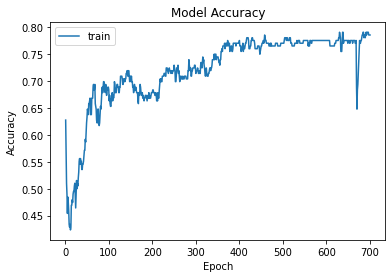

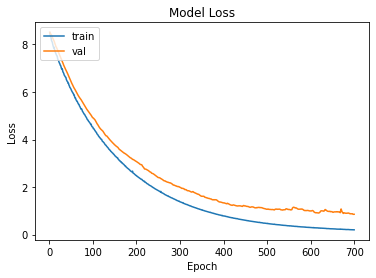

In [ ]:
plot_learningCurve(hist, epochs)

In [ ]:
results = model.evaluate(x_test, y_test)
print('test loss, test acc:', results)

7/7 [==============================] - 0s 5ms/step - loss: 0.8535 - accuracy: 0.7857
test loss, test acc: [0.8535307049751282, 0.7857142686843872]


In [ ]:
results = model.evaluate(x_valid, y_valid)
print('test loss, test acc:', results)

7/7 [==============================] - 0s 5ms/step - loss: 0.8535 - accuracy: 0.7857
test loss, test acc: [0.8535307049751282, 0.7857142686843872]


In [ ]:
results = model.evaluate(x_train2, y_train2)
print('test loss, test acc:', results)

7/7 [==============================] - 0s 5ms/step - loss: 2.1855 - accuracy: 0.4694
test loss, test acc: [2.1855263710021973, 0.4693877696990967]


In [ ]:
results = model.evaluate(x_test2, y_test2)
print('test loss, test acc:', results)

7/7 [==============================] - 0s 4ms/step - loss: 2.3644 - accuracy: 0.4847
test loss, test acc: [2.364392042160034, 0.48469388484954834]
